<a href="https://colab.research.google.com/github/SamyySwift/Hamoye_Internship/blob/master/Quiz_solution_on_grid_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Definition

Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy source, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.

#Importing Libraries

In [8]:
# Importing packages for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing packages for Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing packages for modelling
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing packages for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

###Loading the dataset via url

In [9]:
# dataset url
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv'
# read the csv from the url
df = pd.read_csv(url)
# view first five rows
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


# Data Preprocessing
* Checking and Handling missing values.
* Splitting data into Training and test sets
* Feature Scaling (Standard scaling of data)

In [10]:
# checking for missing values
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

From above we can see that there are no missing values

### Segregating Training and Testing set

In [11]:
# Segregating the features and target
features = df.drop(['stab', 'stabf'], axis = 1)
target = df['stabf']

# splitting the data to training and testing set
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=1)

### Feature Scaling

In [12]:
# Instantiating the Standard Scaler
sc = StandardScaler()

# fit and transform the training set
x_train = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)

# transfoorm the test set
x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

#Quiz Questions

**Question 1**

You are working on a spam classification system using regularized logistic regression. “Spam” is a positive class (y = 1) and “not spam” is the negative class (y = 0). You have trained your classifier and there are n = 2000 examples in the test set. The confusion matrix of predicted class vs. actual class is:

What is the F1 score of this classifier?

**Answer** 0.3177

In [13]:
"""
From the confusion matrix, we are given the following:
TP = 355
FP = 1480
FN = 45
TN = 120
"""

# precsion formula precision = TP/TP + FP 

precision = 355/(355 + 1480)

# Calculate Recall with the formula TP/(TP + FN)
recall = 355/(355 + 45)

# compute the F1 score
f1 = 2*(precision*recall)/(precision + recall)

round(f1, 4)

0.3177

**Question 2**

Which method can we use to best fit a data in Logistic Regression?

**Answer** maximum Likehood

**Question 3**
Why do we use weak learners in boosting?

**Answer:** To make the algorithm stronger

**Question 4**

A data scientist is evaluating different binary classification models. A false positive result is 5 times more expensive (from a business perspective) than a false negative result. The models should be evaluated based on the following criteria:

1) Must have a recall rate of at least 80%

2) Must have a false positive rate of 10% or less

3) Must minimize business costs

After creating each binary classification model, the data scientist generates the corresponding confusion matrix. Which confusion matrix represents the model that satisfies the requirements?

**Answer** option B

In [7]:
# Recall = TP / (TP + FN)
# False Positive Rate (FPR) = FP / (FP + TN)
# Cost = 5 * FP + FN

# computing for option A
print(f'Recall for option A is {78 / (78 + 22)}')
print(f'False Positive Rate for option A is {9 / (9 + 91)}')
print(f'Costs for option A is {5 * 9 + 22} \n')

# computing for option B
print(f'Recall for option B is {82 / (82 + 18)}')
print(f'False Positive Rate for option B is {2 / (2 + 98)}')
print(f'Costs for option B is {5 * 2 + 18}\n')

# computing for option C
print(f'Recall for option C is {90 / (90 + 10)}')
print(f'False Positive Rate for option C is {4 / (4 + 96)}')
print(f'Costs for option C is {5 * 4 + 10} \n')

# computing for option D
print(f'Recall for option D is {79 / (79 + 21)}')
print(f'False Positive Rate for option D is {round(1 / (1 + 91), 2)}')
print(f'Costs for option D is {5 * 1 + 21} \n')

print('Option B meets all the requirements, hence it is the confusion metrix that represents the model')

Recall for option A is 0.78
False Positive Rate for option A is 0.09
Costs for option A is 67 

Recall for option B is 0.82
False Positive Rate for option B is 0.02
Costs for option B is 28

Recall for option C is 0.9
False Positive Rate for option C is 0.04
Costs for option C is 30 

Recall for option D is 0.79
False Positive Rate for option D is 0.01
Costs for option D is 26 

Option B meets all the requirements, hence it is the confusion metrix that represents the model


**Question 5**

You are building a classifier and the accuracy is poor on both the training and test sets. Which would you use to try to improve the performance?

**Answer** Bagging






**Question 6**
Which of the following is not an Ensemble model?

**Answer** DecisionTree

**Question 7**
A classifier predicts if insurance claims are fraudulent or not. The cost of paying a fraudulent claim is higher than the cost of investigating a claim that is suspected to be fraudulent. Which metric should we use to evaluate this classifier?

**Answer** Recall

**Question 8**
The ROC curve above was generated from a classification algorithm. What can we say about this classifier?

**Answer** The model has no descrimination capacity to distinguish between the postive and negative class.

**Question 9**

A random forest classifier was used to classify handwritten digits 0-9 into the numbers they were intended to represent. The confusion matrix below was generated from the results. Based on the matrix, which number was predicted with the least accuracy?

**Answer** : 8

**Question 10**

A medical company is building a model to predict the occurrence of thyroid cancer. The training data contains 900 negative instances (people who don't have cancer) and 100 positive instances. The resulting model has 90% accuracy, but extremely poor recall. What steps can be used to improve the model's performance? (SELECT TWO OPTIONS)

**Answer:**
* Use bagging method
* Generate more samples/data using SMOTE

**Question 11**
You are developing a machine learning classification algorithm that categorizes handwritten digits 0-9 into the numbers they represent. How should you pre-process the label data?

**Answer** OneHotEncoding



**Question 12**
What is the entropy of the target variable if its actual values are given as:

[1,0,1,1,0,1,0]

**Answer** Fromula for calculaying entropy is -Ep(x) *logp(x) hence the answer is -3/7log(3/7) - 4/7log(4/7)

**Question 13**

Which of this is not a good metric for evaluating classification algorithms for data with imbalanced class problems?

**Answer** Accuracy

**Question 14**

What is the accuracy on the test set using the random forest classifier? In 4 decimal places.

**Answer** As shown in the calculations below, the answer is 0.929

In [14]:
# instantiate the RandomForestClassifier with random_state of 1
forest_clf = RandomForestClassifier(random_state=1)

# Fit the classifier with training set
forest_clf.fit(x_train, y_train)

# make predictions
forest_pred = forest_clf.predict(x_test)


# compute the accuracy score
acc_score = round(accuracy_score(y_test, forest_pred), 4)
print(f'Accuracy score of the RandomForestClassifier is {acc_score}')

Accuracy score of the RandomForestClassifier is 0.929


**Question 15**

What is the accuracy on the test set using the xgboost classifier? In 4 decimal places.

**Answer** As shown in the calculations below, the answer is 0.9195

In [15]:
# instantiate the XGBClassifier with random_state of 1
xgb_clf = XGBClassifier(random_state=1)

# Fit the classifier with training set
xgb_clf.fit(x_train, y_train)

# make predictions
xgb_pred = xgb_clf.predict(x_test)

# compute the accuracy score
acc_score = round(accuracy_score(y_test, xgb_pred), 4)
print(f'Accuracy score of the XGBClassifier is {acc_score}')

Accuracy score of the XGBClassifier is 0.9195


**Question 16**

What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

**Answer** from the calculations below, the acuuracy score is 0.9375

In [16]:
# instantiate the LGBMClassifier with random_state of 1
lgbm_clf = LGBMClassifier(random_state=1)

# Fit the classifier with training set
lgbm_clf.fit(x_train, y_train)

# make predictions
lgbm_pred = lgbm_clf.predict(x_test)

# compute the accuracy score
acc_score = round(accuracy_score(y_test, lgbm_pred), 4)
print(f'Accuracy score of the LGBMclassifier is {acc_score}')

Accuracy score of the LGBMclassifier is 0.9375


**Question 17**

To improve the Extra Trees Classifier, you will use the following parameters (number of estimators, minimum number of samples, minimum number of samples for leaf node and the number of features to consider when looking for the best split) for the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV). 

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

**Answer** As shown in the ccomputations below, the answer is option B

In [21]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

# Define the param grid
hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

# Instantiate the ExtratreClassifer
ext_clf = ExtraTreesClassifier(random_state=1)

# instantiate the gridsearch
randomised_grid_search = RandomizedSearchCV(ext_clf, param_distributions= hyperparameter_grid,
                                scoring='accuracy',
                                n_iter=10,
                                cv=5,
                                n_jobs=-1,
                                verbose=1)

# fit the grid with training set
randomised_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [22]:
# Get the best hyperparameters
randomised_grid_search.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

**Question 18**

Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

**Answer** After training a new extratree classifier with the new hperparameters, the accuracy score increased as shown below, hence the answer is HIGHER.

In [20]:

# Compute the old accuracy
ext_clf.fit(x_train, y_train)

old_acc_score = round(accuracy_score(y_test, ext_clf.predict(x_test)), 4)
print(f'old accuracy score is {old_acc_score}')


# Get the model with new hyperparameters from the randomsearchcv
new_model = randomised_grid_search.best_estimator_

# Train a new ExtraTree model with new hyparameters
new_model.fit(x_train, y_train)

# make new predictions
new_pred = new_model.predict(x_test)

# Compute new accuracy score
print(f'New Accuracy score is {round(accuracy_score(y_test, new_pred), 4)}')


old accuracy score is 0.928
New Accuracy score is 0.9335


**Question 19**

What other hyperparameter optimization methods can you try apart from Random Search?

**Answer** GridSearch

**Question 20**

Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?.

**Answer** As shown from the plot below, the answer is tau2 and p1

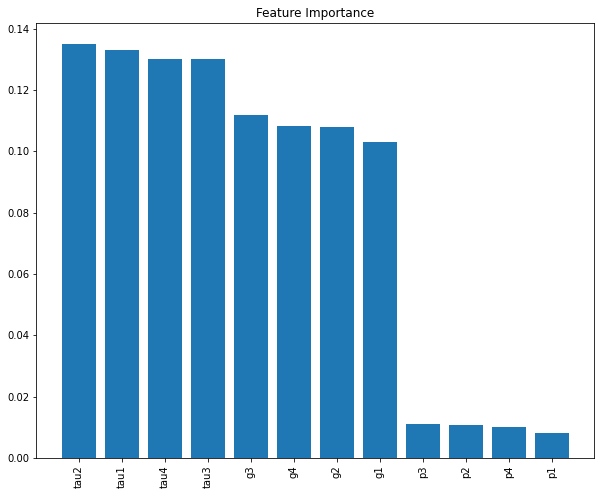

In [ ]:
feature_importances = new_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [x_train.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10, 8))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x_train.shape[1]), feature_importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=90)

# Show plot
plt.show()